<a href="https://colab.research.google.com/github/maskubica/CNN_MNIST/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import dependencies

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Load MNIST dataset

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
tf.keras.backend.image_data_format()

'channels_last'

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### First CNN

In [9]:
model = models.Sequential()

model.add(layers.Convolution2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)))
model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Training first CNN

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=13,
                    verbose=False,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=False)
print(f'Test accuracy: {np.round(score[1],5)*100}%')

Test accuracy: 99.37%


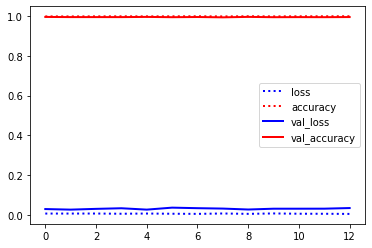

In [19]:
def plot_model_learn(history):

  learning_curves = history.history
  lc = pd.DataFrame(learning_curves)
  lc.plot(lw=2,style=['b:','r:','b-','r-'])
  

plot_model_learn(history)

In [20]:
nvidia-smi

NameError: ignored

### Second CNN

In [0]:
model = models.Sequential()

model.add(layers.Convolution2D(filters=32, kernel_size=(3,3), activation = 'relu',input_shape=(28,28,1)))
model.add(layers.Convolution2D(64, (5, 5), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

### Training second CNN

In [0]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=True,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 47s 789us/step - loss: 0.1813 - acc: 0.9440 - val_loss: 0.0440 - val_acc: 0.9858
Epoch 2/12
60000/60000 [==============================] - 46s 769us/step - loss: 0.0619 - acc: 0.9817 - val_loss: 0.0358 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 43s 723us/step - loss: 0.0428 - acc: 0.9867 - val_loss: 0.0269 - val_acc: 0.9911
Epoch 4/12
60000/60000 [==============================] - 45s 757us/step - loss: 0.0330 - acc: 0.9896 - val_loss: 0.0276 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 43s 711us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0251 - val_acc: 0.9920
Epoch 6/12
60000/60000 [==============================] - 44s 734us/step - loss: 0.0213 - acc: 0.9935 - val_loss: 0.0262 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 43s 724us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.